# 数据加载处理

In [4]:
%matplotlib inline
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt  

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten   # 图像展平层

from tensorflow.keras.utils import plot_model  
from tensorflow.keras.models import load_model  

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data('mnist.npz')
print('x_train的第一条：\n', x_train[0])
print('y_train的第一条：\n', y_train[0])

x_train的第一条：
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 

In [6]:
y_train_df = pd.DataFrame(y_train, columns= ['target'])
y_train_df['target'].value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: target, dtype: int64

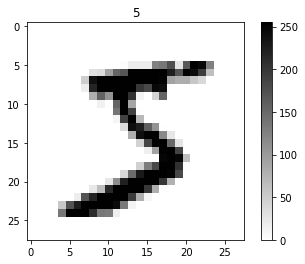

In [7]:
# 查看第一个样本
plt.figure()
plt.imshow(x_train[0], cmap = plt.cm.binary)  # imshow以图片方式展示，plt.cm.binary：灰度显示
plt.colorbar()  # 显示数值范围
plt.title(y_train[0])  # 显示类别号作为标题
plt.show()

In [8]:
# 特征数据标准化 图像类数据，直接/255就可以转换到（0，1）范围内 归一
x_train = x_train / 255.0
x_test = x_test / 255.0

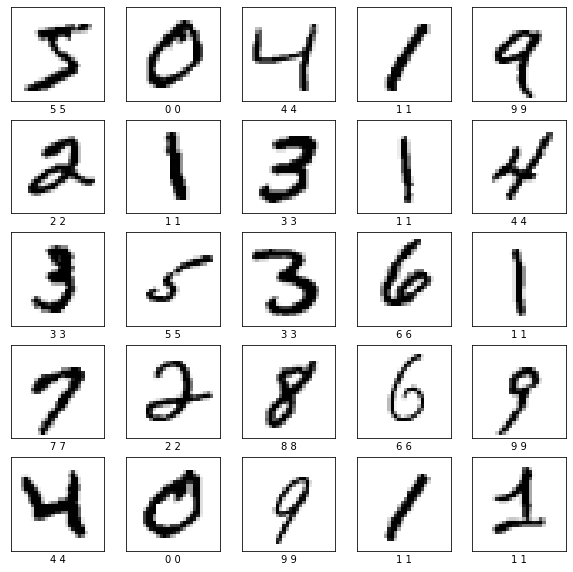

In [9]:
# 给0-9的分类编码
class_names = ['0','1', '2','3','4','5','6','7','8','9']

# 除以255后，再次检查一下图片，是否有问题
plt.figure(figsize=(10,10))  # 设置画布大小
for i in range(25):
    plt.subplot(5,5,i+1)   # 表示一共画5行5列，从第1个子图开始画
    plt.xticks([])    # 不显示x轴
    plt.yticks([])    # 不显示y轴
    plt.imshow(x_train[i], cmap=plt.cm.binary)    # 以图片显示，灰度
    plt.xlabel(str(y_train[i])+ ' ' + class_names[y_train[i]])  # 显示分类数字，和分类名称
plt.show()

In [10]:
# 数据经过标准化操作处理完毕，最后，再确认一遍数据的维度和类型
x_train.shape, y_train.shape, x_test.shape, y_test.shape, type(x_train)

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,), numpy.ndarray)

# 构建模型 

In [11]:
def baseline():
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))
    model.add(Dense(128,activation='relu'))
    model.add(Dense(10, activation = 'softmax'))
    print(model.summary())
    model.compile(optimizer='sgd',
                  loss = 'sparse_categorical_crossentropy',
                  metrics=['accuracy'])  #准确率
    return model

In [12]:
model = baseline()
hs = model.fit(x_train, y_train,  
               epochs=30, 
               batch_size=32,
               validation_data = (x_test, y_test),
               verbose = 2
         )

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/30
1875/1875 - 5s - loss: 0.6699 - accuracy: 0.8332 - val_loss: 0.3562 - val_accuracy: 0.9037
Epoch 2/30
1875/1875 - 3s - loss: 0.3356 - accuracy: 0.9063 - val_loss: 0.2927 - val_accuracy: 0.9192
Epoch 3/30
1875/1875 - 3s - loss: 0.2874 - accuracy: 0.9189 - val_loss: 0.2617 - val_accuracy: 0.9265
Epoch 4/30
1875/1875 - 3s - loss: 0.2579 - accuracy: 0.9276 - val_los

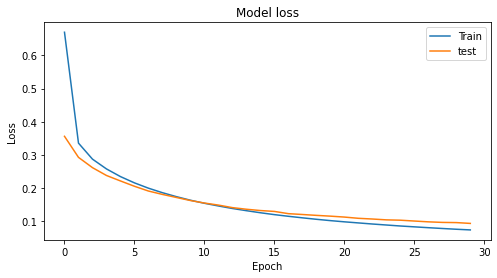

In [15]:
def plot_loss(hs):
    plt.figure(figsize = (8,4))
    plt.plot(hs.history['loss'], label = 'Train')  
    plt.plot(hs.history['val_loss'],label = 'test')  
    plt.title('Model loss')  
    plt.ylabel('Loss')  
    plt.xlabel('Epoch')  
    plt.legend(loc=0)  # loc=0 表示最优位置，自动。也可以手动设置，如：'upper left'等
    plt.show()
    return

plot_loss(hs)

In [16]:
test_pred_proba = model.predict(x_test)
test_pred_proba[:3]

array([[5.1538623e-06, 4.9398363e-07, 1.6935462e-04, 3.0674234e-03,
        2.9935057e-07, 1.3073519e-05, 4.7991402e-09, 9.9668854e-01,
        2.1788754e-05, 3.3838802e-05],
       [5.9118988e-06, 6.6779423e-05, 9.9875450e-01, 7.0190144e-04,
        1.1263355e-09, 3.0036719e-04, 3.1505941e-05, 8.5544027e-10,
        1.3904893e-04, 1.7629319e-10],
       [3.8123620e-05, 9.9088871e-01, 1.9759883e-03, 2.9214547e-04,
        4.5713954e-04, 2.1131296e-04, 3.7535036e-04, 4.2521982e-03,
        1.3243619e-03, 1.8465739e-04]], dtype=float32)

In [17]:
test_pred_class = np.argmax(test_pred_proba, axis = 1) #numpy.argmax(array, axis) 用于返回一个numpy数组中最大值的索引值。当一组中同时出现几个最大值时，返回第一个最大值的索引值。
print('前30个test样本的预测值为： ',test_pred_class[:30])
print('前30个test样本的真实值为： ',y_test[:30])

前30个test样本的预测值为：  [7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1]
前30个test样本的真实值为：  [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1]


In [21]:
from sklearn.metrics import classification_report #显示分类报告
print("test上的分类报告如下：\n",classification_report(y_test, test_pred_class))
train_pred_class = np.argmax(model.predict(x_train), axis = 1)
print("train上的分类报告如下：\n",classification_report(y_train, train_pred_class))

test上的分类报告如下：
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      0.99      0.98      1135
           2       0.97      0.97      0.97      1032
           3       0.95      0.98      0.97      1010
           4       0.97      0.97      0.97       982
           5       0.98      0.96      0.97       892
           6       0.97      0.97      0.97       958
           7       0.97      0.97      0.97      1028
           8       0.97      0.95      0.96       974
           9       0.97      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

train上的分类报告如下：
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      5923
           1       0.98      0.99      0.99      6742
           2       0.98      0.98      0.98    

In [22]:
# 画图展现实际每个类被错判的情况
def plot_each_class(i):
    y_index = np.where(y_test == i) # 所有真实分类为i的y对应的记录的索引号
    y_pred_this_class = test_pred_class[y_index]  # 查看真实分类为i的记录，实际被预测成了什么
    plt.hist(y_pred_this_class, bins = [0,1,2,3,4,5,6,7,8,9])  # hist是直方图, bins设置分箱的边缘数值

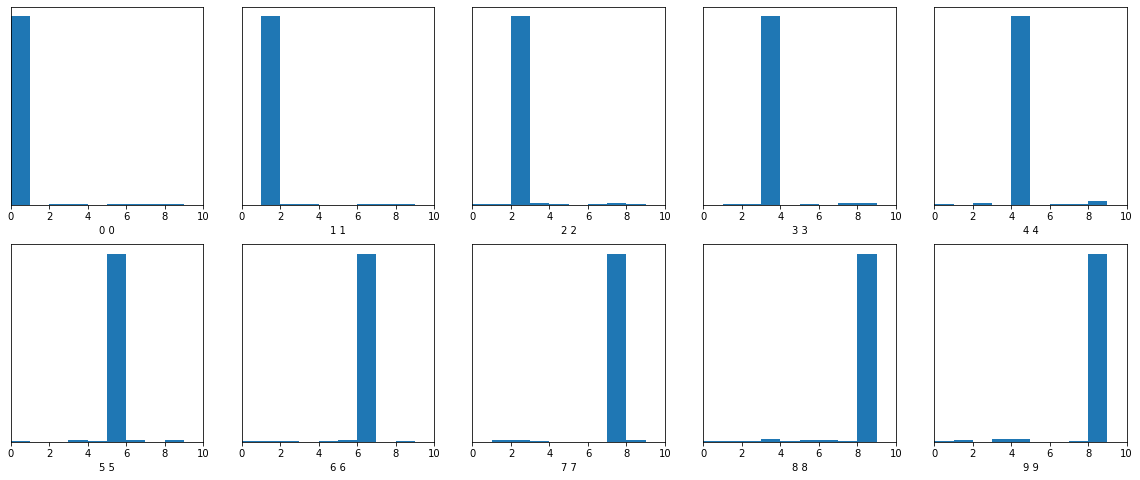

In [23]:
plt.figure(figsize=(20,8))
for i in range(10):
    plt.subplot(2,5,i+1)   # subplot表示画子图，表示一共画2行5列，从第1个子图开始画
    plt.xlim((0,10))
    plt.xticks()
    plt.yticks([])
    plot_each_class(i)
    plt.xlabel(str(i)+ ' ' + class_names[i])  # 显示分类数字，和分类名称
plt.show()

In [25]:
from tensorflow.keras.models import load_model  
model.save('num_classification.h5')  
model_reload = load_model('num_classification.h5')
test_pred_reload = model_reload.predict(x_test)
print('前30个test样本的预测值为：',np.argmax(test_pred_reload, axis = 1)[:30])
print('前30个test样本的真实值为：', y_test[:30])

前30个test样本的预测值为： [7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1]
前30个test样本的真实值为： [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1]


# 模型优化

## rmsprop

In [26]:
def model_rms():
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))
    model.add(Dense(128,activation='relu'))
    model.add(Dense(10, activation = 'softmax'))
    print(model.summary())
    model.compile(optimizer='rmsprop',
                  loss = 'sparse_categorical_crossentropy',  # y不需要做one-hot处理 （0-9）
                  metrics=['accuracy'])
    return model

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


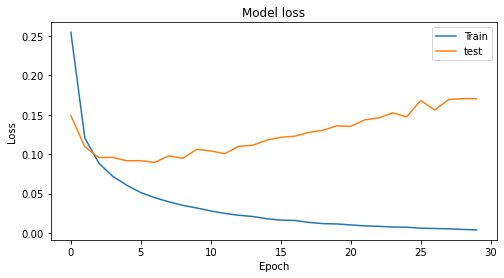

In [30]:
nn_rms = model_rms()
hs_rms = nn_rms.fit(x_train, y_train,  
           epochs = 30,
           batch_size = 32,
           validation_data = (x_test, y_test), 
           verbose = 0
     )
plot_loss(hs_rms)

In [31]:
test_pred_class_rms = np.argmax(nn_rms.predict(x_test), axis = 1)
print("test上的分类报告如下：\n",classification_report(y_test, test_pred_class_rms))
train_pred_class_rms = np.argmax(nn_rms.predict(x_train), axis = 1)
print("train上的分类报告如下：\n",classification_report(y_train, train_pred_class_rms))

test上的分类报告如下：
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.98      0.97      1032
           3       0.97      0.98      0.97      1010
           4       0.98      0.97      0.98       982
           5       0.98      0.98      0.98       892
           6       0.98      0.97      0.98       958
           7       0.99      0.96      0.97      1028
           8       0.96      0.97      0.97       974
           9       0.97      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

train上的分类报告如下：
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5923
           1       1.00      1.00      1.00      6742
           2       1.00      1.00      1.00    

## adam

In [32]:
def model_adam():
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))
    model.add(Dense(128,activation='relu'))
    model.add(Dense(10, activation = 'softmax'))

    print(model.summary())
    
    model.compile(optimizer='adam',
                  loss = 'sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


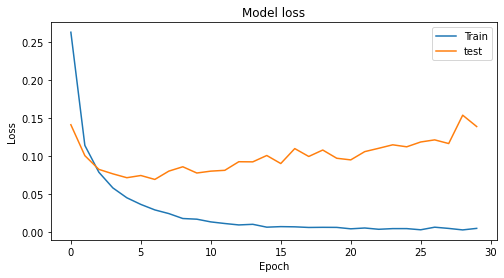

In [33]:
nn_adam = model_adam()
hs_adam = nn_adam.fit(x_train, y_train,  
           epochs = 30, 
           batch_size = 32, 
           validation_data = (x_test, y_test), 
           verbose = 0
     )
plot_loss(hs_adam)

In [41]:
test_pred_class_adm = np.argmax(nn_adam.predict(x_test), axis = 1)
print("test上的分类报告如下：\n",classification_report(y_test, test_pred_class_adm))
test_pred_class_adm = np.argmax(nn_adam.predict(x_train), axis = 1)
print("train上的分类报告如下：\n",classification_report(y_train, test_pred_class_adm))

test上的分类报告如下：
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.97      0.98      1032
           3       0.97      0.97      0.97      1010
           4       0.99      0.96      0.97       982
           5       0.97      0.97      0.97       892
           6       0.97      0.99      0.98       958
           7       0.96      0.98      0.97      1028
           8       0.97      0.97      0.97       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

train上的分类报告如下：
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5923
           1       1.00      1.00      1.00      6742
           2       1.00      1.00      1.00    

## L2

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/80
1875/1875 - 3s - loss: 0.3862 - accuracy: 0.9204 - val_loss: 0.2649 - val_accuracy: 0.9481
Epoch 2/80
1875/1875 - 3s - loss: 0.2346 - accuracy: 0.9559 - val_loss: 0.2076 - val_accuracy: 0.9629
Epoch 3/80
1875/1875 - 3s - loss: 0.2027 - accuracy: 0.9633 - val_loss: 0.1946 - val_accuracy: 0.9659
Epoch 4/80
1875/1875 - 3s - loss: 0.1887 - accuracy: 0.9658 - val_l

Epoch 74/80
1875/1875 - 3s - loss: 0.1247 - accuracy: 0.9788 - val_loss: 0.1661 - val_accuracy: 0.9695
Epoch 75/80
1875/1875 - 3s - loss: 0.1225 - accuracy: 0.9801 - val_loss: 0.1461 - val_accuracy: 0.9739
Epoch 76/80
1875/1875 - 2s - loss: 0.1215 - accuracy: 0.9801 - val_loss: 0.1508 - val_accuracy: 0.9730
Epoch 77/80
1875/1875 - 3s - loss: 0.1211 - accuracy: 0.9804 - val_loss: 0.1469 - val_accuracy: 0.9731
Epoch 78/80
1875/1875 - 3s - loss: 0.1223 - accuracy: 0.9795 - val_loss: 0.1593 - val_accuracy: 0.9683
Epoch 79/80
1875/1875 - 3s - loss: 0.1213 - accuracy: 0.9805 - val_loss: 0.1413 - val_accuracy: 0.9742
Epoch 80/80
1875/1875 - 3s - loss: 0.1215 - accuracy: 0.9804 - val_loss: 0.1410 - val_accuracy: 0.9741


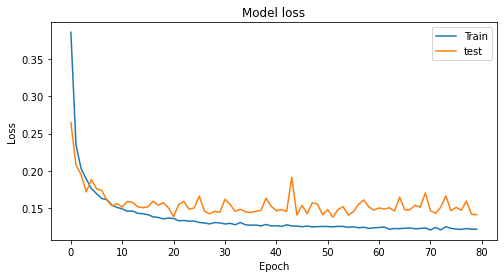

In [35]:
from tensorflow.keras import regularizers
def model_l2():
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))
    model.add(Dense(128,activation='relu', kernel_regularizer=regularizers.l2(0.001)))  # 施加在权重w上的正则项
    model.add(Dense(10, activation = 'softmax'))
    print(model.summary())
    model.compile(optimizer='adam',
                  loss = 'sparse_categorical_crossentropy',  # y不需要做one-hot处理 （0-9）
                  metrics=['accuracy'])
    
    return model

nn_l2 = model_l2()
hs_l2 = nn_l2.fit(x_train, y_train,  
           epochs = 80,  # 迭代次数  
           batch_size = 32,  # 每次用来梯度下降的批处理数据大小  
           validation_data = (x_test, y_test),  # 验证集  
           verbose = 2  # 0不显示训练过程，1全部显示（默认），2精简显示
     )
plot_loss(hs_l2)

In [42]:
test_pred_class_l2 = np.argmax(nn_l2.predict(x_test), axis = 1)
print("test上的分类报告如下：\n",classification_report(y_test, test_pred_class_l2))
test_pred_class_l2 = np.argmax(nn_l2.predict(x_train), axis = 1)
print("train上的分类报告如下：\n",classification_report(y_train, test_pred_class_l2))

test上的分类报告如下：
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      1.00      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.97      0.98      0.97      1010
           4       0.99      0.95      0.97       982
           5       0.97      0.97      0.97       892
           6       0.98      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.99      0.95      0.97       974
           9       0.95      0.98      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

train上的分类报告如下：
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      5923
           1       0.99      1.00      0.99      6742
           2       0.99      0.98      0.99    

## Dorpout earlystopping 

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               100480    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/80
1875/1875 - 3s - loss: 0.4050 - accuracy: 0.9146 - val_loss: 0.2534 - val_accuracy: 0.9545
Epoch 2/80
1875/1875 - 3s - loss: 0.2525 - accuracy: 0.9518 - val_loss: 0.2140 - val_accuracy: 0.9627
Epoch 3/80
1875/1875 - 3s - loss: 0.2

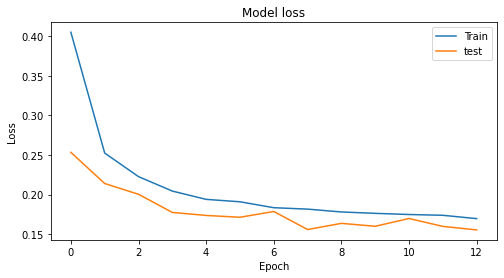

In [46]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5)  

def model_dropout():
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))
    model.add(Dense(128,activation='relu', kernel_regularizer=regularizers.l2(0.001)))  # 施加在权重w上的正则项
    model.add(Dropout(0.1))
    model.add(Dense(10, activation = 'softmax'))
    print(model.summary())
    model.compile(optimizer='adam',
                  loss = 'sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model
nn_dropout = model_dropout()

hs_dropout = nn_dropout.fit(x_train, y_train,  
           epochs = 80, 
           batch_size = 32,
           validation_data = (x_test, y_test),
           verbose = 2,
           callbacks=[early_stopping]  # 提前终止，写在callbacks， 10次不再下降就终止
     )
plot_loss(hs_dropout)

# 总结 

In [51]:
#MNIST数据集在国内无法下载 通过下载已有的导入使用
#学会了使用自适应损失函数和通过L2、随机抛弃、提前终止来降低过拟合